In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from qiskit import *
from qiskit.visualization import plot_histogram
#%run CnotDecomp.ipynb #for importing ccx function

In [2]:
def completeGraphWalk(N,qc,qreg,qcoin):
    qc.swap(qreg[0:N],qcoin)
    return qc

def hadamardCoin(N,qc,qcoin):
    qc.h(qcoin)
    return qc

def grover3Coin(N,qc,qcoin):
    hadamardCoin(N,qc,qcoin)
    qc.u1(np.pi,qcoin[0])
    qc.u2(np.pi,np.pi,qcoin[2])
    qc.ccx(qcoin[0],qcoin[1],qcoin[2])
    qc.u2(2*np.pi,0,qcoin[2])
    hadamardCoin(N,qc,qcoin)
    qc.barrier()
    return qc

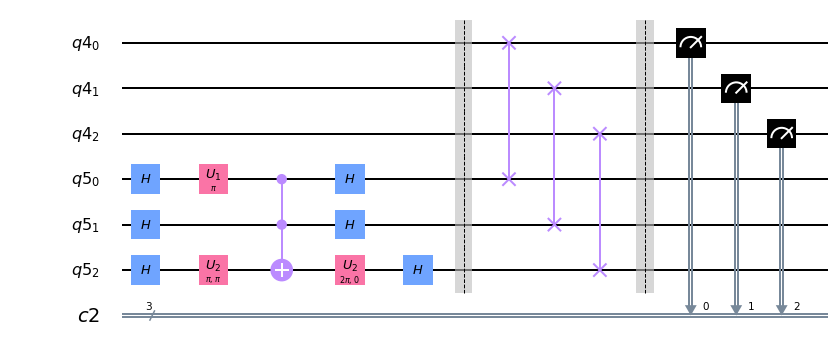

In [6]:
n=3

qreg = QuantumRegister(n)
qsub = QuantumRegister(n)
creg = ClassicalRegister(n)

circ1= QuantumCircuit(qreg,qsub,creg)

circ1 = grover3Coin(n,circ1,qsub)
circ1 = completeGraphWalk(n,circ1,qreg,qsub)
circ1.barrier()
circ1.measure(qreg,creg)

circ1.draw(output='mpl')

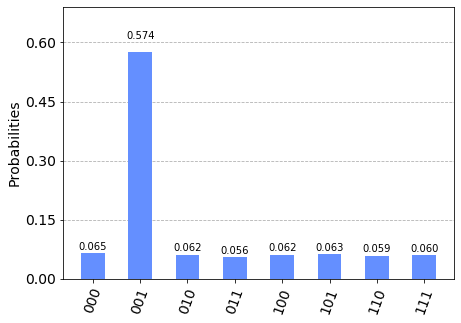

In [7]:
#circuit building
backend = Aer.get_backend('qasm_simulator')

job_sim = execute(circ1, backend=backend, shots=8192,)
#result = job.result()
result_sim = job_sim.result()
result_counts = result_sim.get_counts(circ1)
plot_histogram(result_counts)